In [1]:
import control as ct
from control.matlab import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
G = ct.zpk([], [1, -50, -50], 10000, name="G")

In [4]:
print(G)

<TransferFunction>: G
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


           1e+04
----------------------------
s^3 + 99 s^2 + 2400 s - 2500



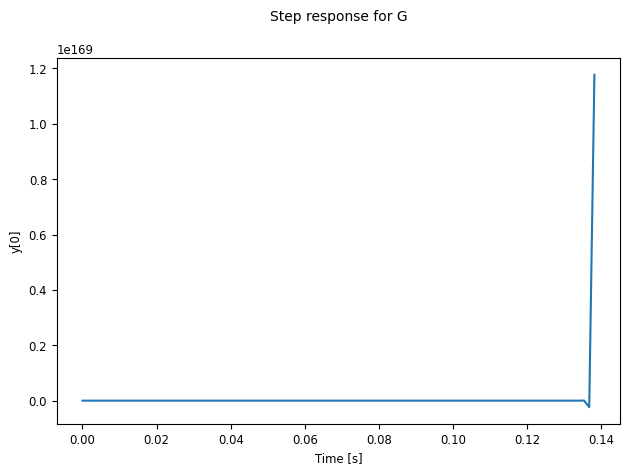

In [6]:
ct.step_response(G).plot()

In [10]:
kc=0.5; taoi = 1.25; K1=ct.tf([kc*taoi, kc], [taoi, 0], name="K1");

In [8]:
print(K1)

<TransferFunction>: K1
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.625 s + 0.5
-------------
   1.25 s



In [11]:
kc=1.25; taoi = 1.25; K2=ct.tf([kc*taoi, kc], [taoi, 0], name="K2");

In [12]:
kc=2; taoi = 1.25; K3=ct.tf([kc*taoi, kc], [taoi, 0], name="K3");

In [13]:
loop1 = ct.series(G, K1, name = "loop1"); loop2 = ct.series(G, K2, name = "loop2"); loop3 = ct.series(G, K3, name = "loop3");

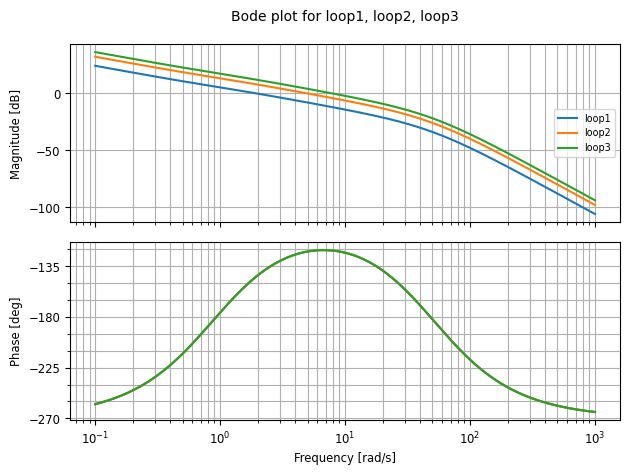

In [14]:
ct.bode([loop1, loop2, loop3])

In [16]:
T1 = ct.feedback(loop1, 1, name="T1"); T2 = ct.feedback(loop2, 1, name="T2"); T3 = ct.feedback(loop3, 1, name="T3");  

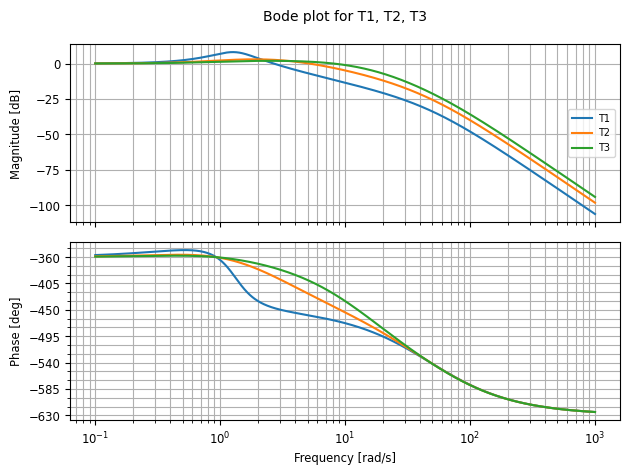

In [17]:
ct.bode([T1, T2, T3])

In [18]:
t1, YT1 = ct.step_response(T1, T=10); t2, YT2 = ct.step_response(T2, T=10); t3, YT3 = ct.step_response(T3, T=10);

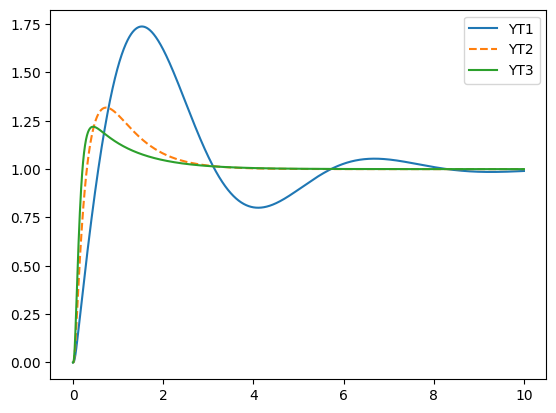

In [19]:
fig, ax=plt.subplots(); ax.plot(t1, YT1, label="YT1"); ax.plot(t2, YT2, label="YT2", linestyle="--"); ax.plot(t3, YT3, label="YT3"); plt.legend(); fig.show() 

In [20]:
S1 = ct.feedback(1, loop1, name="S1"); S2 = ct.feedback(1, loop2, name="S2"); S3 = ct.feedback(1, loop3, name="S3");

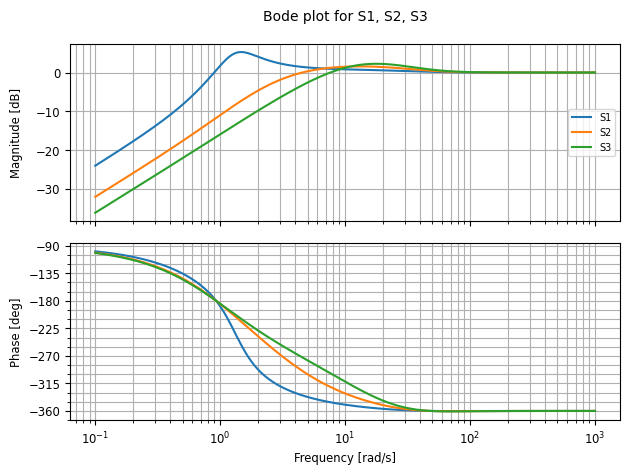

In [21]:
ct.bode([S1, S2, S3])

In [22]:
SK1 = ct.series(S1, K1); SK2 = ct.series(S2, K2); SK3 = ct.series(S3, K3);

In [23]:
t1, YSK1 = ct.step_response(SK1, T=10); t2, YSK2 = ct.step_response(SK2, T=10); t3, YSK3 = ct.step_response(SK3, T=10);

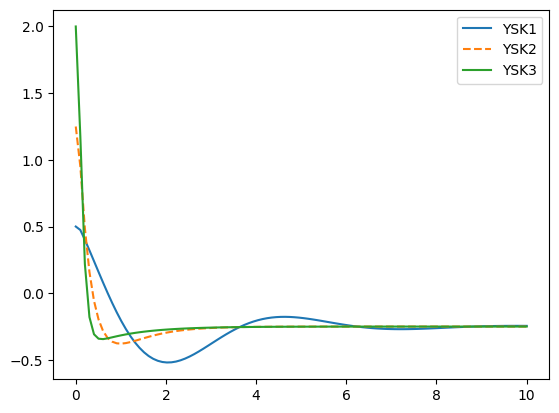

In [24]:
fig, ax=plt.subplots(); ax.plot(t1, YSK1, label="YSK1"); ax.plot(t2, YSK2, label="YSK2", linestyle="--"); ax.plot(t3, YSK3, label="YSK3"); plt.legend(); fig.show() 